In [12]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from cedenar_anomalies.utils.paths import (
    data_processed_dir,
    data_raw_dir,
data_interim_dir
)

In [3]:
# !pip uninstall matplotlib
# !pip cache purge #Clean cache
# !pip install matplotlib

In [4]:
os.getcwd()

'/Users/frandak2/Documents/repos/cedenar_anomalies/notebooks'

In [5]:
pd.set_option("display.max_rows", None)  # Mostrar todas las filas
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas

In [7]:
import pandas as pd
ruta_archivo = data_raw_dir("anomalias 2022 23 y 24.xlsx")
df = pd.read_excel(ruta_archivo)

In [8]:
# Filtrar por la variable Zona igual a "PA"
df_pa = df[df["Zona"] == "PA"].copy()

In [9]:
# Crear un nuevo dataset con las columnas especificadas
columnas_deseadas = [
    "Orden",
    "Usuario",
    "Ejecucion",
    "Estado",
    "Codigo",
    "Anomalia",
    "Causa",
    "Descripcion",
    "Motivo",
    "kWh Rec",
    "Factor",
]
df_nuevo = df_pa[columnas_deseadas].copy()

In [10]:
# Identificar columnas problemáticas
columnas_problema = df_nuevo.select_dtypes(include=["object"]).columns

# Convertir columnas problemáticas a cadenas de texto
for col in columnas_problema:
    df_nuevo[col] = df_nuevo[col].astype(str)

In [11]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12045 entries, 7 to 34681
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Orden        12045 non-null  int64  
 1   Usuario      12045 non-null  int64  
 2   Ejecucion    12045 non-null  object 
 3   Estado       12045 non-null  object 
 4   Codigo       12045 non-null  object 
 5   Anomalia     12045 non-null  object 
 6   Causa        12045 non-null  object 
 7   Descripcion  12045 non-null  object 
 8   Motivo       12045 non-null  object 
 9   kWh Rec      7682 non-null   float64
 10  Factor       8 non-null      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.1+ MB


In [13]:
df_nuevo.to_csv(data_interim_dir("anomalias_pa.csv"), index=False)

In [14]:
df_nuevo.head()

,Orden,Usuario,Ejecucion,Estado,Codigo,Anomalia,Causa,Descripcion,Motivo,kWh Rec,Factor
7,10699622,1149695,2022-01-04 10:22:40-05,Pendiente,EEM / EEM / EEM,Elemento Extrano Dentro / Elemento Extrano Den...,CAUSA NO DETERMINADA,Posible anomalia,nan,0.0,NaN
11,11168065,544326,2021-03-27 08:04:44-05,Aprobada,30004,OTRAS ANOMALÍAS REINCIDENTE PARE,CAUSA NO DETERMINADA,Anomalia verificada y aprobada,Otras Anomalias,NaN,NaN
13,11232649,1142265,2021-04-09 10:56:34-05,Pendiente,30004,OTRAS ANOMALÍAS REINCIDENTE PARE,CAUSA NO DETERMINADA,Posible anomalia,nan,NaN,NaN
15,11353009,543180,2021-04-06 09:30:10-05,Aprobada,30004,OTRAS ANOMALÍAS REINCIDENTE PARE,CAUSA NO DETERMINADA,Anomalia verificada y aprobada,Otras Anomalias,NaN,NaN
16,11353141,543302,2021-04-07 11:04:04-05,Pendiente,30004,OTRAS ANOMALÍAS REINCIDENTE PARE,CAUSA NO DETERMINADA,Posible anomalia,nan,NaN,NaN


In [15]:
df_nuevo.columns

Index(['Orden', 'Usuario', 'Ejecucion', 'Estado', 'Codigo', 'Anomalia',
       'Causa', 'Descripcion', 'Motivo', 'kWh Rec', 'Factor'],
      dtype='object')

In [16]:
import pandas as pd

# Suponiendo que df_nuevo ya está definido

# Crear una copia del DataFrame para evitar modificar el original
df_nuevo_copia = df_nuevo.copy()


# Función para expandir los registros con múltiples códigos
def expandir_codigos(row):
    codigos = str(row["Codigo"]).split("/")
    nuevas_filas = []
    for codigo in codigos:
        nueva_fila = row.copy()
        nueva_fila["Codigo"] = (
            codigo.strip()
        )  # Eliminar espacios en blanco alrededor del código
        nuevas_filas.append(nueva_fila)
    return pd.DataFrame(nuevas_filas)


# Aplicar la función a las filas con "/" en la columna "Codigo"
filas_a_expandir = df_nuevo_copia[df_nuevo_copia["Codigo"].str.contains("/")]
nuevos_registros = pd.concat(
    filas_a_expandir.apply(expandir_codigos, axis=1).tolist(), ignore_index=True
)

# Eliminar los registros originales con "/" en la columna "Codigo"
df_nuevo_copia = df_nuevo_copia[~df_nuevo_copia["Codigo"].str.contains("/")]

# Concatenar los nuevos registros con el DataFrame original
df_nuevo_copia = pd.concat([df_nuevo_copia, nuevos_registros], ignore_index=True)

# Guardar el DataFrame modificado en un archivo Excel (opcional)
df_nuevo_copia.to_csv(data_interim_dir("df_nuevo_codigos_separados.csv"), index=False)

In [17]:
columnas_deseadas = [
    "Orden",
    "Usuario",
    "Ejecucion",
    "Codigo",
    "Descripcion",
    "Motivo",
    "kWh Rec",
    "Factor",
]
df_anom_sep = df_nuevo_copia[columnas_deseadas].copy()

In [18]:
df_anom_sep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37767 entries, 0 to 37766
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Orden        37767 non-null  int64  
 1   Usuario      37767 non-null  int64  
 2   Ejecucion    37767 non-null  object 
 3   Codigo       37767 non-null  object 
 4   Descripcion  37767 non-null  object 
 5   Motivo       37767 non-null  object 
 6   kWh Rec      31475 non-null  float64
 7   Factor       11 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 2.3+ MB


In [49]:
df_anom_sep.head(2)

,Orden,Usuario,Ejecucion,Codigo,Descripcion,Motivo,kWh Rec,Factor
0,11168065,544326,2021-03-27 08:04:44-05,30004,Anomalia verificada y aprobada,Otras Anomalias,NaN,NaN
1,11232649,1142265,2021-04-09 10:56:34-05,30004,Posible anomalia,nan,NaN,NaN


In [19]:
ruta_archivo = data_raw_dir("items anomalia ponderado.xlsx")
df_ponderado = pd.read_excel(ruta_archivo)

In [20]:
df_ponderado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          63 non-null     int64 
 1   Sigla       63 non-null     object
 2   Movil       63 non-null     int64 
 3   Item        62 non-null     object
 4   Creado      63 non-null     object
 5   Nombre      63 non-null     object
 6   Activo      62 non-null     object
 7   puntaje     63 non-null     int64 
 8   evaluacion  63 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 4.6+ KB


In [21]:
df_anom_sep_copia = df_anom_sep.copy()

# Realizar la combinación (merge) de los DataFrames
df_anom_sep_copia = pd.merge(
    df_anom_sep_copia, df_ponderado, left_on="Codigo", right_on="Item", how="left"
)

# Seleccionar solo las columnas deseadas
columnas_deseadas = list(df_anom_sep.columns) + ["id", "Nombre", "puntaje", "evaluacion"]
df_anom_sep_copia = df_anom_sep_copia[columnas_deseadas]

# Guardar el DataFrame modificado en un archivo Excel (opcional)
df_anom_sep_copia.to_csv(data_interim_dir("df_anom_sep_extendido.csv"), index=False)

In [53]:
df_anom_sep_copia.head(3)

,Orden,Usuario,Ejecucion,Codigo,Descripcion,Motivo,kWh Rec,Factor,id,Nombre,puntaje,evaluacion
0,11168065,544326,2021-03-27 08:04:44-05,30004,Anomalia verificada y aprobada,Otras Anomalias,NaN,NaN,40.0,OTRAS ANOMALÍAS REINCIDENTE PARE,1.0,1.0
1,11232649,1142265,2021-04-09 10:56:34-05,30004,Posible anomalia,nan,NaN,NaN,40.0,OTRAS ANOMALÍAS REINCIDENTE PARE,1.0,1.0
2,11353009,543180,2021-04-06 09:30:10-05,30004,Anomalia verificada y aprobada,Otras Anomalias,NaN,NaN,40.0,OTRAS ANOMALÍAS REINCIDENTE PARE,1.0,1.0


In [22]:
df_anom_sep_copia["evaluacion"].value_counts()

evaluacion
3.0    77584
1.0    41973
2.0    41476
Name: count, dtype: int64

In [23]:
df_anom_sep_copia.columns

Index(['Orden', 'Usuario', 'Ejecucion', 'Codigo', 'Descripcion', 'Motivo',
       'kWh Rec', 'Factor', 'id', 'Nombre', 'puntaje', 'evaluacion'],
      dtype='object')

In [24]:
ruta_archivo = data_raw_dir("cedenar_data.xlsx")
usu_pacifico = pd.read_excel(ruta_archivo)
df_usuarios = usu_pacifico[usu_pacifico.ZONA == "PACIFICO"].copy()

In [25]:
df_usuarios.head(2)

,PRODUCT_ID,PRODUCTO,CONTRATO,CLIENTE,NOMBRE_CLIENTE,APELLIDO_CLIENTE,ZONA,SECCIONAL,DIRECCION_PRODUCTO,MUNICIPIO_PRODUCTO,VEREDA_CENTRO_POBLADO,BARRIO_PRODUCTO,SECTOR_OPERATIVO_PRODUCTO,COD_CICLO_CONSUMO,CICLO_CONSUMO,COD_CICLO_FACTURACION,CICLO_FACTURACION,RUTA,DES_RUTA,ORDEN_PREDIO,AREA,FECHA_INSTALACION_PRODUCTO,ESTADO_DE_CORTE,ESTADO_PRODUCTO,FECHA_RETIRO_PRODUCTO,SERVICIO_PROVISIONAL,PRODUCTO_ACTIVO,CATEGORIA,SUB_CATEGORIA,ZONA_TARIFARIA,PLAN_COMERCIAL,METOD_VARCON,TRAFO_OPEN,FECHA_INGRESO_A_SISTEMA,FECHA_DE_CONEXION,CARTERA_EN_MORA,CARTERA_TOTAL,CARGA_INSTALADA,MODO_ADQUISICION,MEDIDOR,COMPONENTE,CODIGO_MEDIDOR,FECHA_INSTALACION,ESTADO_MEDIDOR,COMPONENT_TYPE_ID,CLASE_SERVICIO,TIPO_MEDIDOR,GAMA,TIPO_ITEM,FASES,TRAFO_SPARD,KVA,CIRCUITO,NIVEL,LATI_USU,LONG_USU,LATI_TRAFO,LONG_TRAFO
146,597102,597102,597102,100706,MARCIAL VICTORIANO_ LOPEZ NARVAEZ,NaN,PACIFICO,PACIFICO,EL ESFURZO I CS 347 DIV 1,TUMACO,SAN ANDRES DE TUMACO DISTRITO ESPECIAL INDUS...,EL ESFUERZO,114-TUMACO URBANO,4,0Y-TARIFA PARA CLAUSURA PACIFI,4,0Y-TARIFA PARA CLAUSURA PACIFI,5.0,2182-RUTA 2182 DE TUMACO,6058.0,Urbano,2000-10-10,92-Retiro definitivo,3-Retirado,2020-07-06,N,N,1-RESIDENCIAL,1-ESTRATO 1,-1-POR DEFECTO,16-RESIDENCIAL - DIRECTO,5013-PRODUCTOS DIRECTOS,TM30006,2000-10-10,2000-10-10,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,1184921,1184921,1184921,100802,ZAIDA JACKELINE,VALVERDE QUIÑONES,PACIFICO,PACIFICO,CS 53 A PRADOMAR DIV 1,TUMACO,SAN ANDRES DE TUMACO DISTRITO ESPECIAL INDUS...,PRADOMAR,114-TUMACO URBANO,54,0G-MEDIDA CENTRALIZADA TUMACO,54,0G-MEDIDA CENTRALIZADA TUMACO,4040.0,7510 - TUMACO VIADUCTO CONVENCIONAL MORRITO TR...,35560.0,Urbano,2016-02-29,1-Conexión,1-Activo,4732-12-31,N,Y,1-RESIDENCIAL,1-ESTRATO 1,-1-POR DEFECTO,31-PLAN RESIDENCIAL TELEMEDIDO,5004-CLIENTES TELEMEDIDOS,60TA030352,2016-02-29,2016-02-29,0.0,47090.0,1.8,C - comodato,MEC-54186,1605850.0,301790.0,2016-02-29,21-Pendiente de Retiro,18.0,3257-MEDIDOR AMI,NaN,NaN,NaN,NaN,60TA030352,45.0,60TM03,1.0,1.819331,-78.749592,1.819363,-78.749388


In [26]:
columnas_deseadas = [
    "PRODUCTO",
    "AREA",
    "PLAN_COMERCIAL",
    "TRAFO_OPEN",
    "FASES",
    "KVA",
    "LATI_USU",
    "LONG_USU",
]
df_usuarios_f = df_usuarios[columnas_deseadas].copy()

In [27]:
df_usuarios_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86423 entries, 146 to 622449
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PRODUCTO        86423 non-null  int64  
 1   AREA            86409 non-null  object 
 2   PLAN_COMERCIAL  86423 non-null  object 
 3   TRAFO_OPEN      84291 non-null  object 
 4   FASES           67434 non-null  float64
 5   KVA             73318 non-null  float64
 6   LATI_USU        73318 non-null  float64
 7   LONG_USU        73318 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 5.9+ MB


In [28]:
usuarios_unicos = pd.DataFrame(df_anom_sep_copia["Usuario"].unique(), columns=["Usuario"])
usuarios_unicos.to_excel("usuarios_unicos_anomal.xlsx", index=False)

print("Valores únicos de 'Usuario' guardados en usuarios_unicos_anomal.xlsx")

# 2. Crear un nuevo dataset comparando y agregando columnas
df_nuevo_extendido = pd.merge(
    df_anom_sep_copia, df_usuarios_f, left_on="Usuario", right_on="PRODUCTO", how="left"
)

# Seleccionar solo las columnas deseadas
columnas_deseadas = [
    "Orden",
    "Usuario",
    "Ejecucion",
    "Codigo",
    "Descripcion",
    "Motivo",
    "kWh Rec",
    "Factor",
    "id",
    "Nombre",
    "Factor",
    "AREA",
    "PLAN_COMERCIAL",
    "TRAFO_OPEN",
    "FASES",
    "KVA",
    "LATI_USU",
    "LONG_USU",
    "puntaje",
    "evaluacion",
]
df_nuevo_extendido = df_nuevo_extendido[columnas_deseadas]

# Mostrar las primeras filas del nuevo dataset extendido
print("\nNuevo dataset extendido (df_nuevo_extendido):")

# Guardar el nuevo dataset extendido en un archivo Excel (opcional)
df_nuevo_extendido.to_excel("df_nuevo_extendido.xlsx", index=False)

Valores únicos de 'Usuario' guardados en usuarios_unicos_anomal.xlsx

Nuevo dataset extendido (df_nuevo_extendido):


In [29]:
df_nuevo_extendido.head()

,Orden,Usuario,Ejecucion,Codigo,Descripcion,Motivo,kWh Rec,Factor,id,Nombre,Factor,AREA,PLAN_COMERCIAL,TRAFO_OPEN,FASES,KVA,LATI_USU,LONG_USU,puntaje,evaluacion
0,11168065,544326,2021-03-27 08:04:44-05,30004,Anomalia verificada y aprobada,Otras Anomalias,NaN,NaN,40.0,OTRAS ANOMALÍAS REINCIDENTE PARE,NaN,Urbano,2-PLAN RESIDENCIAL,05TN000137,2.0,45.0,1.672157,-78.142107,1.0,1.0
1,11232649,1142265,2021-04-09 10:56:34-05,30004,Posible anomalia,nan,NaN,NaN,40.0,OTRAS ANOMALÍAS REINCIDENTE PARE,NaN,Urbano,2-PLAN RESIDENCIAL,05TN000114,1.0,45.0,1.673809,-78.140233,1.0,1.0
2,11353009,543180,2021-04-06 09:30:10-05,30004,Anomalia verificada y aprobada,Otras Anomalias,NaN,NaN,40.0,OTRAS ANOMALÍAS REINCIDENTE PARE,NaN,Urbano,2-PLAN RESIDENCIAL,05TN000131,3.0,75.0,1.671898,-78.140568,1.0,1.0
3,11353141,543302,2021-04-07 11:04:04-05,30004,Posible anomalia,nan,NaN,NaN,40.0,OTRAS ANOMALÍAS REINCIDENTE PARE,NaN,Urbano,2-PLAN RESIDENCIAL,05TN000137,1.0,45.0,1.672003,-78.141612,1.0,1.0
4,11353226,544763,2021-04-07 13:18:27-05,30004,Posible anomalia,nan,NaN,NaN,40.0,OTRAS ANOMALÍAS REINCIDENTE PARE,NaN,Urbano,2-PLAN RESIDENCIAL,05TN000111,1.0,45.0,1.675486,-78.137020,1.0,1.0


In [30]:
df_nuevo_extendido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161685 entries, 0 to 161684
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Orden           161685 non-null  int64  
 1   Usuario         161685 non-null  int64  
 2   Ejecucion       161685 non-null  object 
 3   Codigo          161685 non-null  object 
 4   Descripcion     161685 non-null  object 
 5   Motivo          161685 non-null  object 
 6   kWh Rec         137965 non-null  float64
 7   Factor          41 non-null      float64
 8   id              161033 non-null  float64
 9   Nombre          161033 non-null  object 
 10  Factor          41 non-null      float64
 11  AREA            161416 non-null  object 
 12  PLAN_COMERCIAL  161416 non-null  object 
 13  TRAFO_OPEN      161290 non-null  object 
 14  FASES           159813 non-null  float64
 15  KVA             161328 non-null  float64
 16  LATI_USU        161328 non-null  float64
 17  LONG_USU  

In [79]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Suponiendo que df_nuevo_extendido ya está definido

# # Calcular la cantidad de valores vacíos por columna
# valores_vacios = df_nuevo_extendido.isnull().sum()

# # Crear un gráfico de barras
# plt.figure(figsize=(12, 6))
# valores_vacios.plot(kind='bar')
# plt.title('Cantidad de Valores Vacíos por Columna')
# plt.xlabel('Columnas')
# plt.ylabel('Cantidad de Valores Vacíos')
# plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
# plt.tight_layout()  # Ajustar el diseño para evitar recortes de etiquetas
# plt.show()

In [31]:
df_nuevo_extendido["evaluacion"].value_counts()

evaluacion
3.0    77584
1.0    41973
2.0    41476
Name: count, dtype: int64

In [32]:
df_nuevo_extendido["puntaje"].value_counts()

puntaje
5.0    68758
1.0    41973
2.0    38595
4.0     8826
3.0     2881
Name: count, dtype: int64

In [33]:
df_nuevo_extendido.head(2)

,Orden,Usuario,Ejecucion,Codigo,Descripcion,Motivo,kWh Rec,Factor,id,Nombre,Factor,AREA,PLAN_COMERCIAL,TRAFO_OPEN,FASES,KVA,LATI_USU,LONG_USU,puntaje,evaluacion
0,11168065,544326,2021-03-27 08:04:44-05,30004,Anomalia verificada y aprobada,Otras Anomalias,NaN,NaN,40.0,OTRAS ANOMALÍAS REINCIDENTE PARE,NaN,Urbano,2-PLAN RESIDENCIAL,05TN000137,2.0,45.0,1.672157,-78.142107,1.0,1.0
1,11232649,1142265,2021-04-09 10:56:34-05,30004,Posible anomalia,nan,NaN,NaN,40.0,OTRAS ANOMALÍAS REINCIDENTE PARE,NaN,Urbano,2-PLAN RESIDENCIAL,05TN000114,1.0,45.0,1.673809,-78.140233,1.0,1.0


In [34]:
df_nuevo_extendido.columns

Index(['Orden', 'Usuario', 'Ejecucion', 'Codigo', 'Descripcion', 'Motivo',
       'kWh Rec', 'Factor', 'id', 'Nombre', 'Factor', 'AREA', 'PLAN_COMERCIAL',
       'TRAFO_OPEN', 'FASES', 'KVA', 'LATI_USU', 'LONG_USU', 'puntaje',
       'evaluacion'],
      dtype='object')

In [85]:
# 'Usuario',  'id', 'AREA', 'PLAN_COMERCIAL', 'LATI_USU', 'LONG_USU', 'evaluacion'
#  'id', 'AREA', 'PLAN_COMERCIAL'
# 'Usuario',   'LATI_USU', 'LONG_USU', 'evaluacion'
# 'Usuario',  id', 'AREA', 'PLAN_COMERCIAL', 'LATI_USU', 'LONG_USU', 'evaluacion'

In [36]:
# Crear una copia del DataFrame original
df_label_encoded_cluster = df_nuevo_extendido.copy()

# Lista para almacenar los mapeos de niveles originales y sus códigos
category_mappings = {}

# Columnas a codificar
columns_to_encode = ["id", "AREA", "PLAN_COMERCIAL"]  # Ajusta a tus columnas

# Aplicar Label Encoding a cada columna
for col in columns_to_encode:
    # Convertir a tipo categoría
    df_label_encoded_cluster[col] = df_label_encoded_cluster[col].astype("category")

    # Guardar el mapeo de niveles
    category_mappings[col] = dict(enumerate(df_label_encoded_cluster[col].cat.categories))

    # Reemplazar los valores por sus códigos numéricos
    df_label_encoded_cluster[col] = df_label_encoded_cluster[col].cat.codes

In [37]:
import json

# Guardar en archivo JSON
with open("category_mappings_anomaly_ext.json", "w") as f:
    json.dump(category_mappings, f)

# Cargar desde archivo JSON
with open("category_mappings_anomaly_ext.json", "r") as f:
    loaded_mappings = json.load(f)

In [38]:
df_label_encoded_cluster.to_csv(data_interim_dir("df_label_encoded_anomaly_ext.csv"), index=False)

In [39]:
columnas_deseadas = [
    "Usuario",
    "id",
    "AREA",
    "PLAN_COMERCIAL",
    "LATI_USU",
    "LONG_USU",
    "puntaje",
    "evaluacion",
]
df_label_encoded_extendido = df_label_encoded_cluster[columnas_deseadas]

In [40]:
df_label_encoded_extendido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161685 entries, 0 to 161684
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Usuario         161685 non-null  int64  
 1   id              161685 non-null  int8   
 2   AREA            161685 non-null  int8   
 3   PLAN_COMERCIAL  161685 non-null  int8   
 4   LATI_USU        161328 non-null  float64
 5   LONG_USU        161328 non-null  float64
 6   puntaje         161033 non-null  float64
 7   evaluacion      161033 non-null  float64
dtypes: float64(4), int64(1), int8(3)
memory usage: 6.6 MB


In [41]:
df_label_encoded_extendido.head()

,Usuario,id,AREA,PLAN_COMERCIAL,LATI_USU,LONG_USU,puntaje,evaluacion
0,544326,22,2,4,1.672157,-78.142107,1.0,1.0
1,1142265,22,2,4,1.673809,-78.140233,1.0,1.0
2,543180,22,2,4,1.671898,-78.140568,1.0,1.0
3,543302,22,2,4,1.672003,-78.141612,1.0,1.0
4,544763,22,2,4,1.675486,-78.137020,1.0,1.0


In [42]:
df_label_encoded_extendido.to_csv(data_interim_dir("df_label_encoded_tra_ext.csv"), index=False)
df_label_encoded_extendido.to_csv(data_interim_dir("df_anomaly_encoded_limpio_train.csv"), index=False)

# borrar de aqui pa abajo

In [46]:
som = MiniSom(8, 8, df_label_encoded_cluster.shape[1], sigma=0.3, learning_rate=0.5)
som.train_random(df_label_encoded_cluster.values, 100)

NameError: name 'MiniSom' is not defined

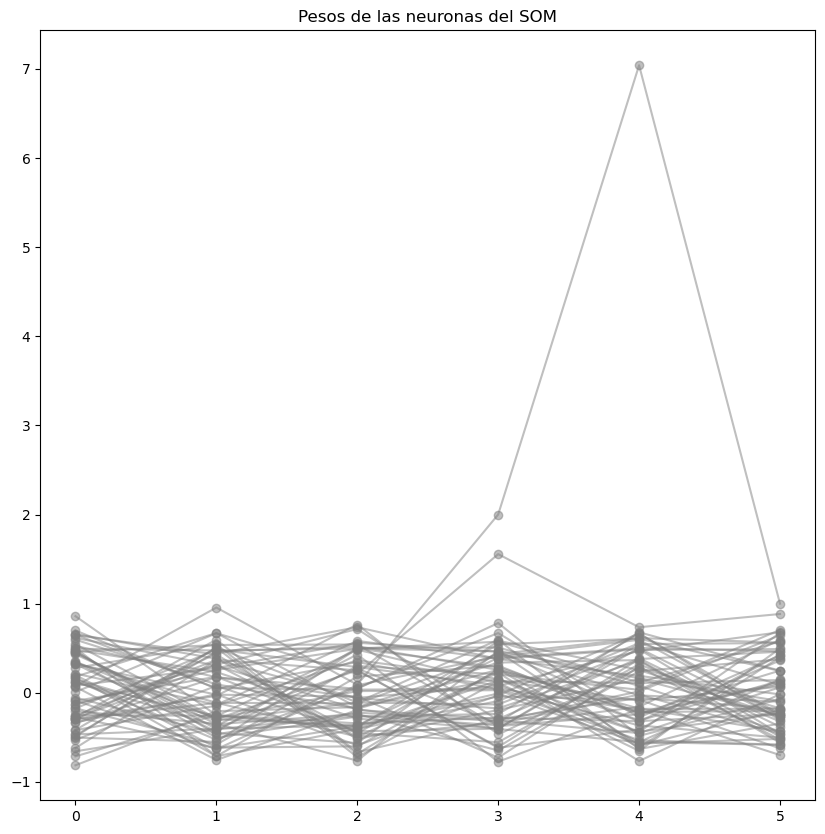

In [163]:
# Visualizar los pesos de las neuronas (corregido)
plt.figure(figsize=(10, 10))
for i in range(8):
    for j in range(8):
        plt.plot(
            som._weights[i, j], marker="o", linestyle="-", color="gray", alpha=0.5
        )  # Corregido
plt.title("Pesos de las neuronas del SOM")
plt.show()

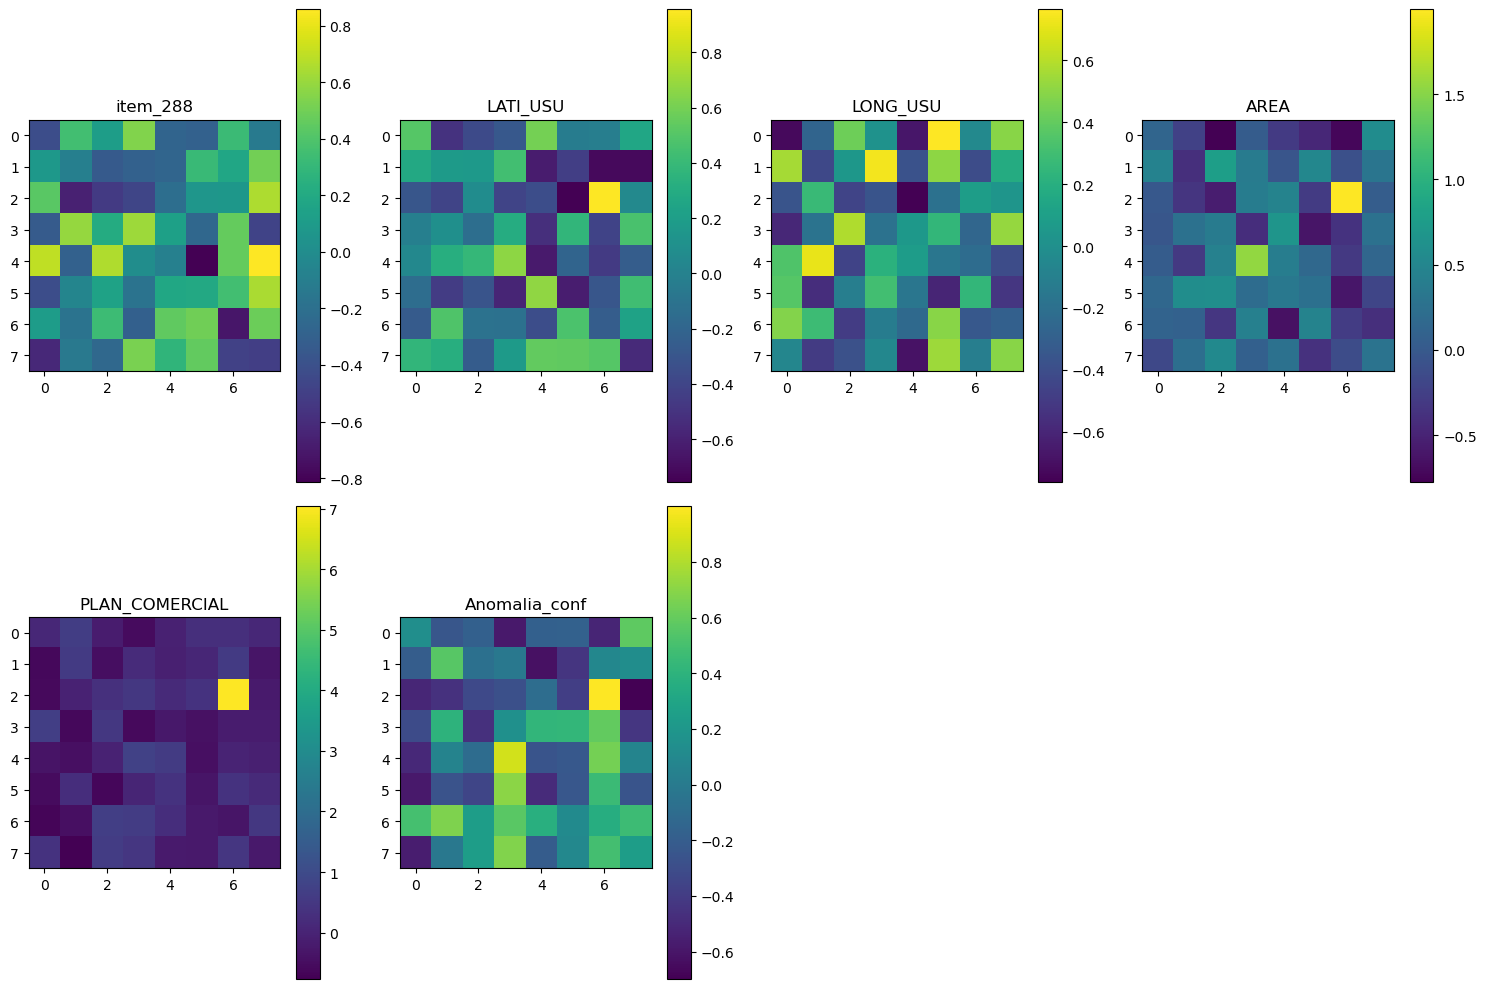

In [165]:
# Visualización de la distribución de características (corregido)
num_cols = len(df_label_encoded_cluster.columns)
rows = int(np.ceil(num_cols / 4))  # Calcular el número de filas necesarias

plt.figure(figsize=(15, 5 * rows))  # Ajustar la altura de la figura
for i, feature_name in enumerate(df_train.columns):
    plt.subplot(rows, 4, i + 1)
    feature_map = np.array(
        [som._weights[x, y][i] for x in range(8) for y in range(8)]
    ).reshape(8, 8)
    plt.imshow(feature_map, cmap="viridis")
    plt.title(feature_name)
    plt.colorbar()
plt.tight_layout()
plt.show()

# Clustering Jerarquico

In [167]:
# Obtener los pesos de las neuronas
weights = som._weights.reshape(-1, df_label_encoded_cluster.shape[1])  # Aplanar los pesos

In [93]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [169]:
# Realizar el clustering jerárquico
linked = linkage(
    weights, "ward"
)  # Usar el método 'ward' para minimizar la varianza dentro de los clusters

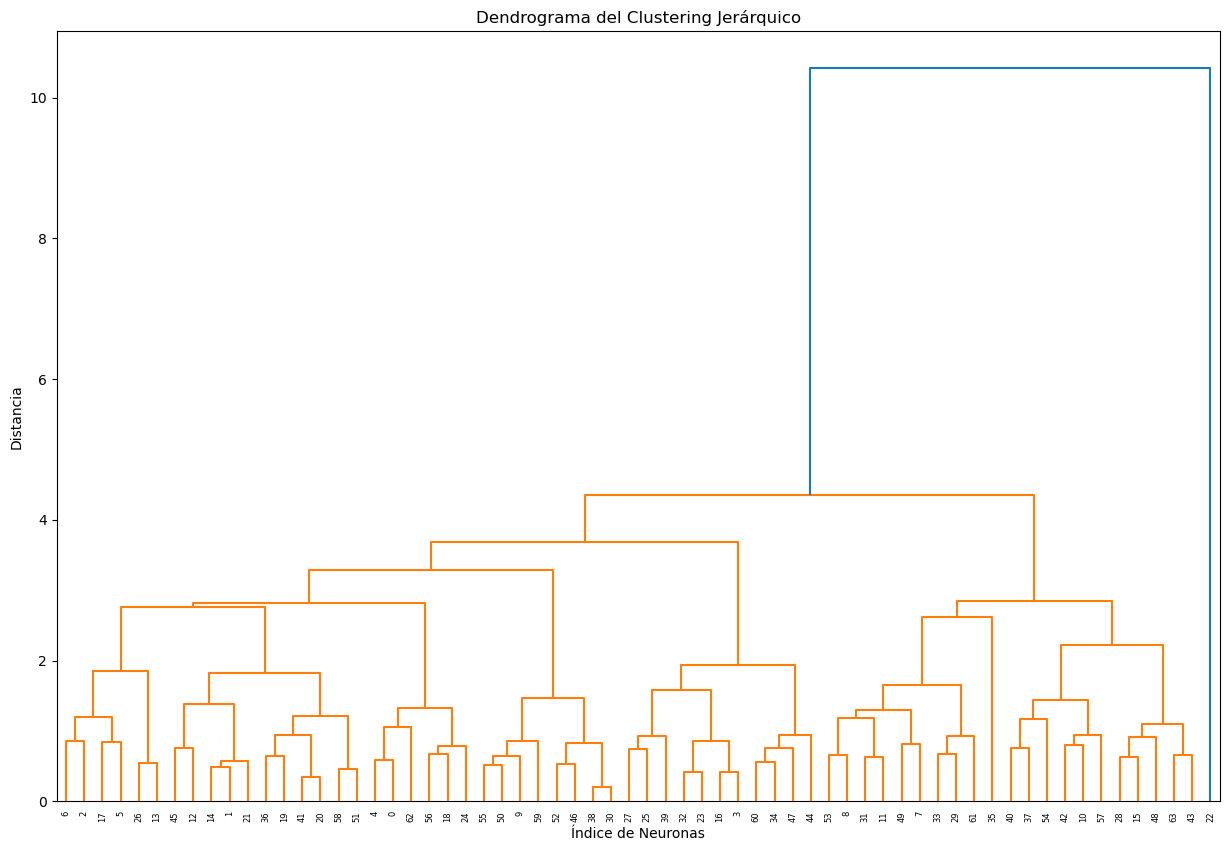

In [171]:
# Crear el dendrograma
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Dendrograma del Clustering Jerárquico")
plt.xlabel("Índice de Neuronas")
plt.ylabel("Distancia")
plt.show()

In [175]:
from scipy.cluster.hierarchy import fcluster

# Determinar la cantidad de clusters
n_clusters = 3

# Asignar clusters a las neuronas
clusters = fcluster(linked, n_clusters, criterion="maxclust")

# Imprimir los clusters asignados a cada neurona
print(clusters)

[2 2 2 2 2 2 2 1 1 2 1 1 2 2 2 1 2 2 2 2 2 2 3 2 2 2 2 2 1 1 2 1 2 1 2 1 2
 1 2 2 1 2 1 1 2 2 2 2 1 1 2 2 2 1 1 2 2 1 2 2 2 1 2 1]


In [177]:
# Obtener las coordenadas de las neuronas
neuron_coordinates = np.array([[i, j] for i in range(8) for j in range(8)])

# Asignar clusters a las coordenadas de las neuronas
clustered_neurons = np.hstack((neuron_coordinates, clusters.reshape(-1, 1)))

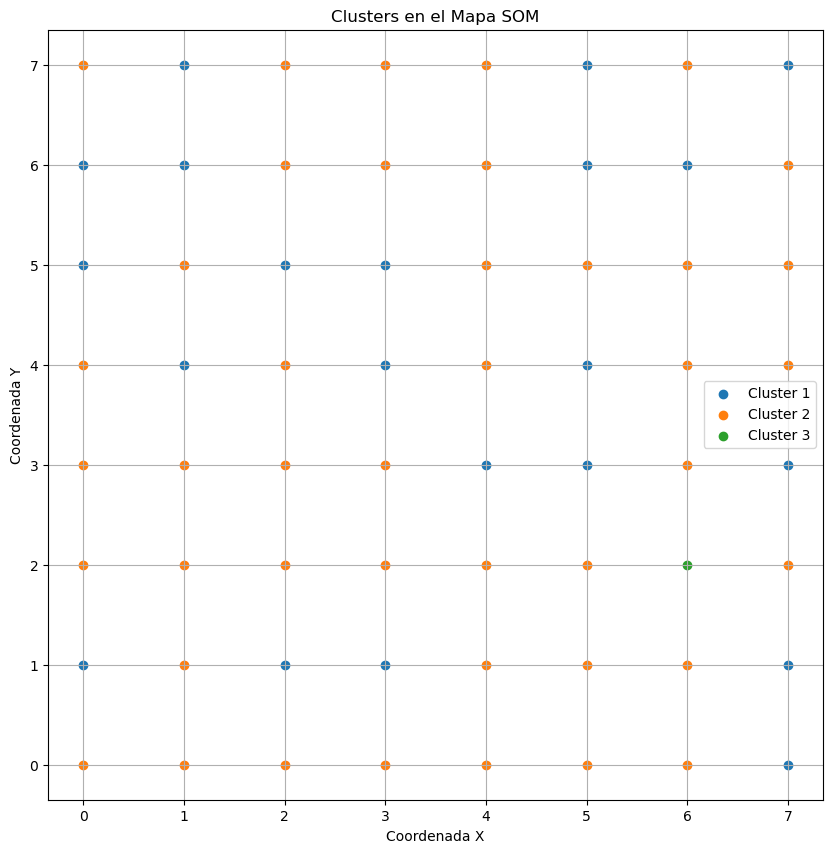

In [179]:
# Crear la gráfica de clusters
plt.figure(figsize=(10, 10))
for cluster_id in np.unique(clusters):
    cluster_neurons = clustered_neurons[clustered_neurons[:, 2] == cluster_id]
    plt.scatter(
        cluster_neurons[:, 1], cluster_neurons[:, 0], label=f"Cluster {cluster_id}"
    )

plt.title("Clusters en el Mapa SOM")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.legend()
plt.xticks(range(8))
plt.yticks(range(8))
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16920\4058874208.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_clusters))


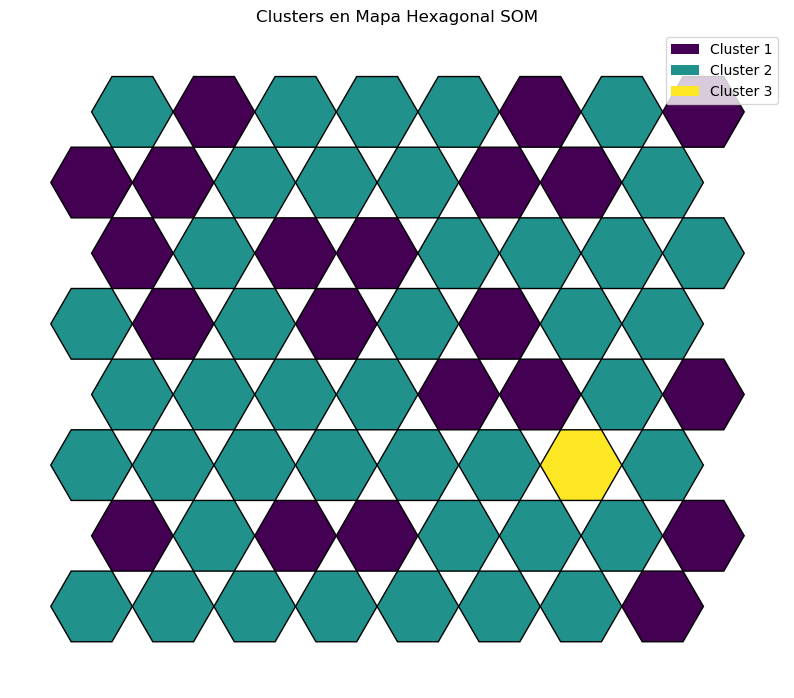

In [181]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage

# Crear el mapa hexagonal
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Coordenadas de los centros de los hexágonos
x_coords = np.array([j + (i % 2) * 0.5 for i in range(8) for j in range(8)])
y_coords = np.array([i * np.sqrt(3) / 2 for i in range(8) for j in range(8)])

# Paleta de colores para los clusters
unique_clusters = np.unique(clusters)
colors = plt.cm.get_cmap("viridis", len(unique_clusters))

# Crear leyenda personalizada
legend_elements = []
for cluster_id in unique_clusters:
    color = colors(np.where(unique_clusters == cluster_id)[0][0])
    legend_elements.append(mpatches.Patch(facecolor=color, label=f"Cluster {cluster_id}"))

# Iterar sobre cada hexágono y asignar color según el cluster
for i, (x, y) in enumerate(zip(x_coords, y_coords)):
    cluster_id = clusters[i]
    color = colors(np.where(unique_clusters == cluster_id)[0][0])
    hexagon = mpatches.RegularPolygon(
        (x, y),
        numVertices=6,
        radius=0.5,
        orientation=np.radians(30),
        facecolor=color,
        edgecolor="black",
    )
    ax.add_patch(hexagon)

# Ajustar los límites del gráfico
ax.set_xlim(min(x_coords) - 1, max(x_coords) + 1)
ax.set_ylim(min(y_coords) - 1, max(y_coords) + 1)
ax.set_aspect("equal")

# Agregar leyenda al gráfico
plt.legend(handles=legend_elements, loc="upper right")

plt.title("Clusters en Mapa Hexagonal SOM")
plt.axis("off")  # Ocultar los ejes
plt.show()

In [183]:
df_label_encoded_cluster.head()

,item_288,LATI_USU,LONG_USU,AREA,PLAN_COMERCIAL,Anomalia_conf
0,0.084137,0.981575,0.054119,2.0,8.0,1.0
1,0.010602,0.975543,0.052930,2.0,8.0,1.0
2,0.064402,0.976166,0.055192,2.0,5.0,1.0
3,0.997182,0.966629,0.039622,2.0,8.0,1.0
4,0.993289,0.968326,0.045248,2.0,5.0,1.0


In [185]:
# Obtener el BMU para cada dato de entrada
bmus = [som.winner(x) for x in df_label_encoded_cluster.values]

# Asignar el cluster del BMU a cada dato de entrada
df_label_encoded_cluster["Neuron_Index"] = [
    np.ravel_multi_index(bmu, (8, 8)) for bmu in bmus
]

neuron_cluster_mapping = dict(zip(range(64), clusters))

df_train_copy["Cluster"] = df_label_encoded_cluster["Neuron_Index"].map(
    neuron_cluster_mapping
)

In [193]:
df_label_encoded_cluster["Cluster"] = df_label_encoded_cluster["Neuron_Index"].map(
    neuron_cluster_mapping
)

In [195]:
df_label_encoded_cluster.head()

,item_288,LATI_USU,LONG_USU,AREA,PLAN_COMERCIAL,Anomalia_conf,Neuron_Index,Cluster
0,0.084137,0.981575,0.054119,2.0,8.0,1.0,22,3
1,0.010602,0.975543,0.052930,2.0,8.0,1.0,22,3
2,0.064402,0.976166,0.055192,2.0,5.0,1.0,22,3
3,0.997182,0.966629,0.039622,2.0,8.0,1.0,22,3
4,0.993289,0.968326,0.045248,2.0,5.0,1.0,22,3


In [125]:
df_train_copy.head()

,item_288,LATI_USU,LONG_USU,AREA,PLAN_COMERCIAL,Anomalia_conf,Cluster
0,1065193,1.811442,-78.769160,Urbano,31-PLAN RESIDENCIAL TELEMEDIDO,No anomalia,1
1,462370,1.805372,-78.771186,Urbano,31-PLAN RESIDENCIAL TELEMEDIDO,No anomalia,1
2,903404,1.805999,-78.767334,Urbano,2-PLAN RESIDENCIAL,No anomalia,1
3,8550053,1.796402,-78.793846,Urbano,31-PLAN RESIDENCIAL TELEMEDIDO,No anomalia,1
4,8518138,1.798110,-78.784266,Urbano,2-PLAN RESIDENCIAL,No anomalia,1


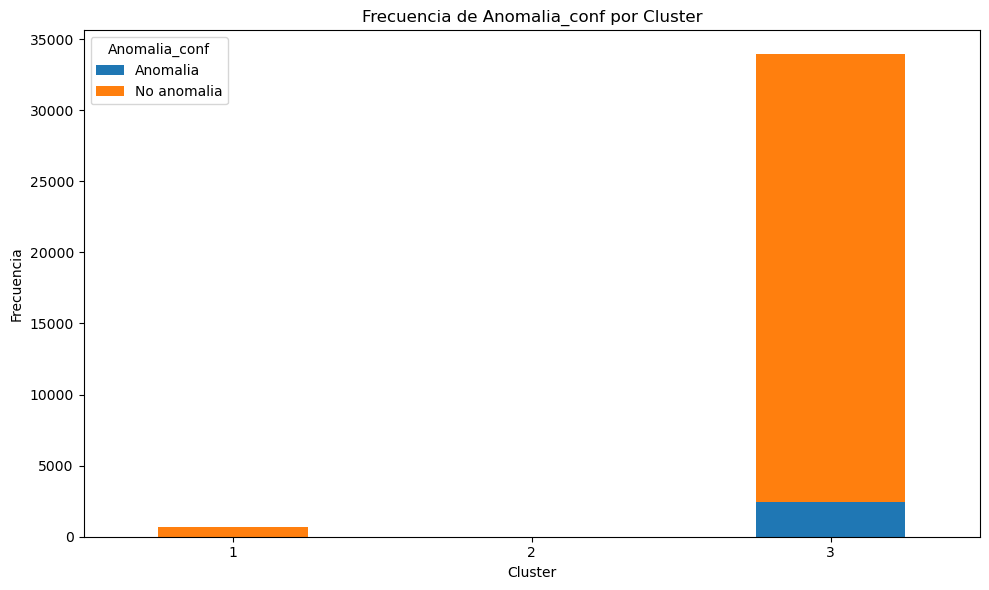

In [191]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que df_train_copy ya está definido

# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df_train_copy["Cluster"], df_train_copy["Anomalia_conf"])

# Crear la gráfica de barras apiladas
tabla_contingencia.plot(kind="bar", stacked=True, figsize=(10, 6))

# Agregar etiquetas y título
plt.title("Frecuencia de Anomalia_conf por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()

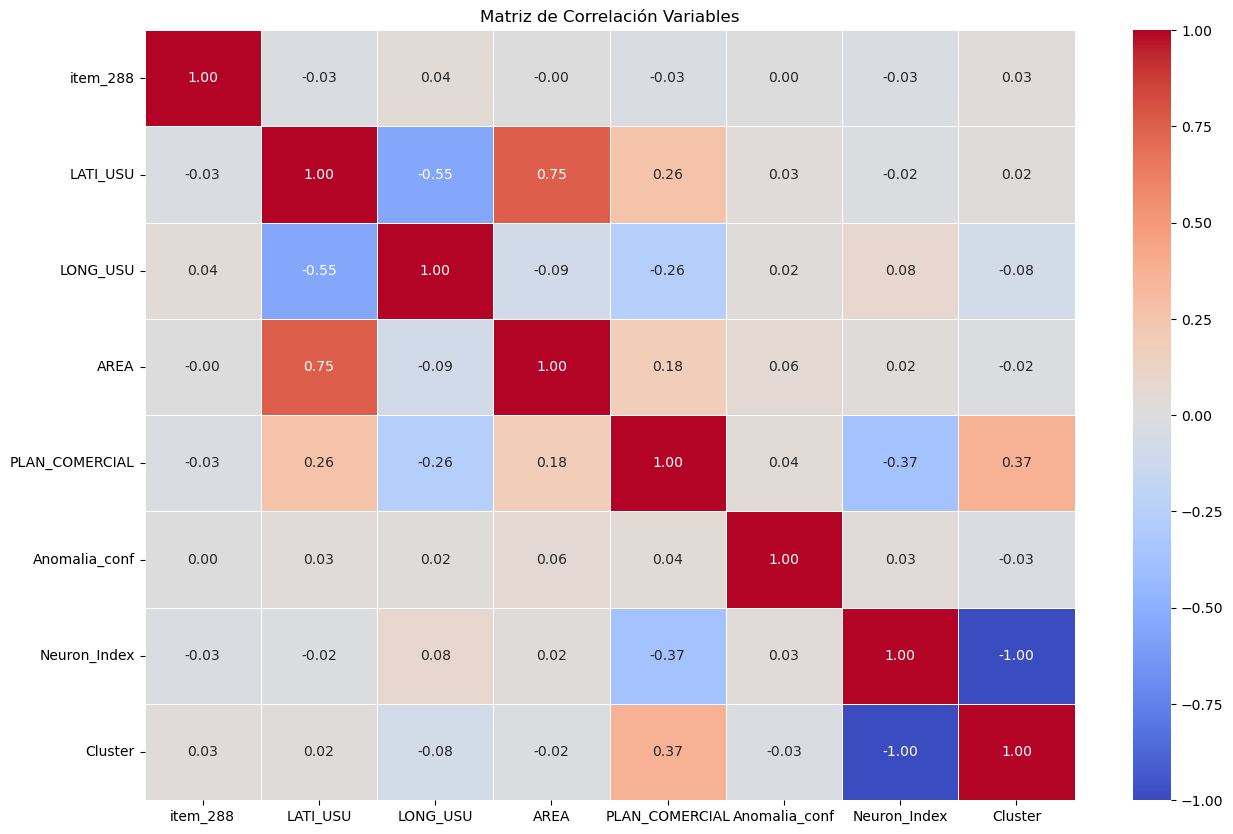

In [197]:
# Calcular la matriz de correlación
matriz_correlacion = df_label_encoded_cluster.corr().round(decimals=2)

# Configurar el gráfico de Seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(
    matriz_correlacion,
    annot=True,  # Muestra los valores en el mapa de calor
    cmap="coolwarm",  # Paleta de colores
    fmt=".2f",  # Formato de los números
    linewidths=0.5,  # Líneas entre celdas
)

# Agregar título
plt.title("Matriz de Correlación Variables")
plt.show()